In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

ruta_actual = os.path.abspath(os.getcwd())
root_path = None

while True:
    if os.path.exists(os.path.join(ruta_actual, 'src')):
        root_path = ruta_actual
        break
    parent = os.path.dirname(ruta_actual)
    if parent == ruta_actual: break
    ruta_actual = parent


Importamos las funciones de limpieza y categorización de los datos 

In [26]:
if root_path:
    sys.path.append(os.path.join(root_path, 'src'))
    
    try:
        from data_cleaning import cargar_y_limpiar_datos, generar_matriz_rentabilidad
        from categorization import obtener_categoria
        print("Funciones importadas correctamente.")
    except ImportError as e:
        print(f"Error al importar: {e}")
        print("Asegúrate de que 'data_cleaning.py' y 'categorization.py' estén en la carpeta 'src'.")
        
    # Ruta del archivo CSV
    ruta_csv = os.path.join(root_path, 'data', 'raw', 'dataset_perros_mx_1000.csv')
else:
    print("No se encontró la carpeta raíz del proyecto.")

Funciones importadas correctamente.


In [27]:
if os.path.exists(ruta_csv):
    df = cargar_y_limpiar_datos(ruta_csv)
    
    df['categoria'] = df['titulo'].apply(obtener_categoria)
    
    df = generar_matriz_rentabilidad(df)
    print('Datos listos para graficar')
else:
    print('No se encontró el archivo CSV.')

Filas duplicadas detectadas: 0
Filas eliminadas por datos faltantes: 0
Total de registros final: 1274
Media del precio: $319.00
Media de la cantidad vendida: 1,000 unidades

--- Distribución de Productos por Segmento ---
segmento_estrategico
(Alto Valor / Alto Volumen)    353
(Bajo Valor / Alto Volumen)    320
(Bajo Valor / Bajo Volumen)    311
(Alto Valor / Bajo Volumen)    290
Name: count, dtype: int64

--- Generación de Ingresos por Segmento ---
segmento_estrategico
(Alto Valor / Alto Volumen)    $2,384,636,000.00
(Bajo Valor / Alto Volumen)      $208,011,000.00
(Alto Valor / Bajo Volumen)       $40,259,653.00
(Bajo Valor / Bajo Volumen)        $8,565,720.00
Name: ingresos_estimados, dtype: object
Datos listos para graficar


In [28]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

-- Gráfica de Barras Segmento vs Ingreso ---

C:\Users\Denis\AppData\Local\Temp\ipykernel_15236\3297588896.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=datos_millones.values, y=datos_millones.index, palette='viridis')


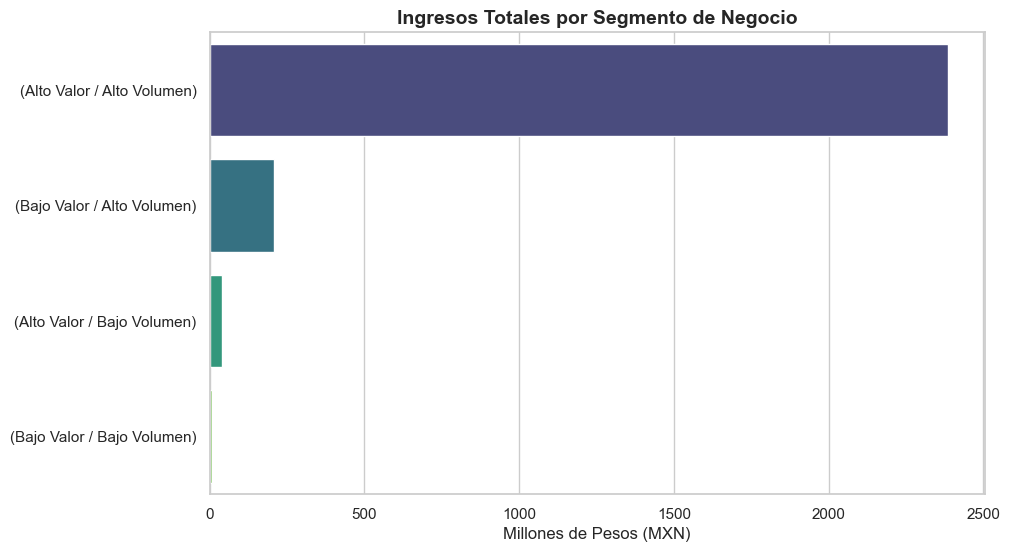

In [29]:
datos_grafica1 = df.groupby('segmento_estrategico')['ingresos_estimados'].sum().sort_values(ascending=False)
datos_millones = datos_grafica1 / 1000000 
plt.figure()
sns.barplot(x=datos_millones.values, y=datos_millones.index, palette='viridis')

plt.title('Ingresos Totales por Segmento de Negocio', fontsize=14, fontweight='bold')
plt.xlabel('Millones de Pesos (MXN)')
plt.ylabel('')
plt.show()

El análisis de ingresos revela una concentración de valor altamente asimétrica. El segmento clasificado como "Alto Valor / Alto Volumen" (Productos Estrella) domina la facturación total del mercado, generando ingresos superiores a los $2,300 millones de MXN. Esta cifra representa una disparidad significativa respecto a los demás cuadrantes, superando por un amplio margen la suma combinada de los segmentos restantes.

Histograma de precios (Distribución General)

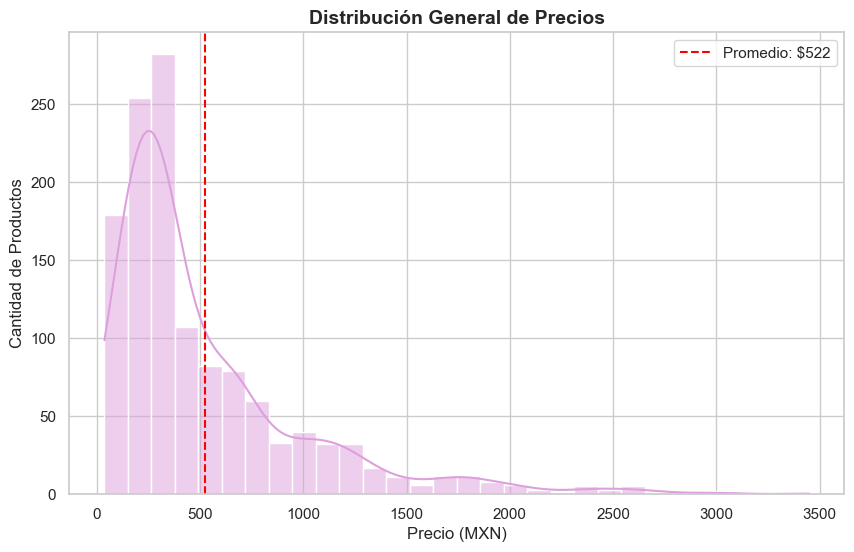

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['precio'], bins=30, kde=True, color='plum')

plt.title('Distribución General de Precios', fontsize=14, fontweight='bold')
plt.xlabel('Precio (MXN)')
plt.ylabel('Cantidad de Productos')

promedio = df['precio'].mean()
plt.axvline(promedio, color='red', linestyle='--', label=f'Promedio: ${promedio:,.0f}')

plt.legend() 
plt.show()

En el gráfico observamos que la oferta se concentra principalmente entre los $0 y $500, 
confirmando que el grueso de la demanda en productos para perros busca precios accesibles. 
Sin embargo, el mercado no es uniforme: existe un segundo grupo relevante de gama media ($500-$700) 
y una 'cola' extendida hacia precios superiores a $1000, validando la existencia de un 
segmento premium con menor volumen pero mayor valor unitario

 --- Gráfica Scatter Plot Precio vs Ventas ---

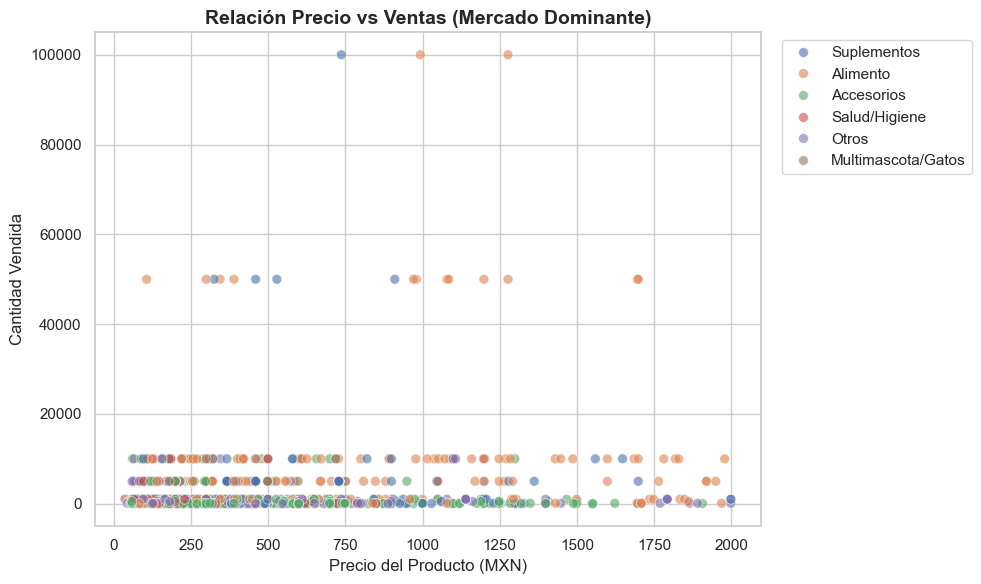

In [31]:
df_limpio = df[df['precio'] < 2000]

plt.figure()
sns.scatterplot(
    data=df_limpio, 
    x='precio', 
    y='vendidos_estimados', 
    hue='categoria',  
    alpha=0.6,        
    s=50              
)

plt.title('Relación Precio vs Ventas (Mercado Dominante)', fontsize=14, fontweight='bold')
plt.xlabel('Precio del Producto (MXN)')
plt.ylabel('Cantidad Vendida')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left') 
plt.tight_layout()
plt.show()

Dominio de Consumibles (Puntos Naranjas y Azules): Las categorías "Alimento" y "Suplementos" demuestran la mayor resiliencia al precio. Observamos productos que superan las 50,000 unidades vendidas incluso en rangos de precios elevados ($750 - $1,250 MXN). Esto sugiere una demanda inelástica impulsada por la necesidad recurrente del producto.

Saturación en Accesorios (Puntos Verdes): Aunque la categoría "Accesorios" tiene una alta densidad de oferta (muchos puntos), la gran mayoría se concentra en la base del gráfico (bajas ventas). A diferencia del alimento, es difícil escalar la venta de accesorios a volúmenes masivos, lo que confirma que es un mercado fragmentado de "cola larga" (long tail).

-- Gráfica de categorías más importantes ---

C:\Users\Denis\AppData\Local\Temp\ipykernel_15236\1737474517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_cat.values, y=conteo_cat.index, palette='magma')


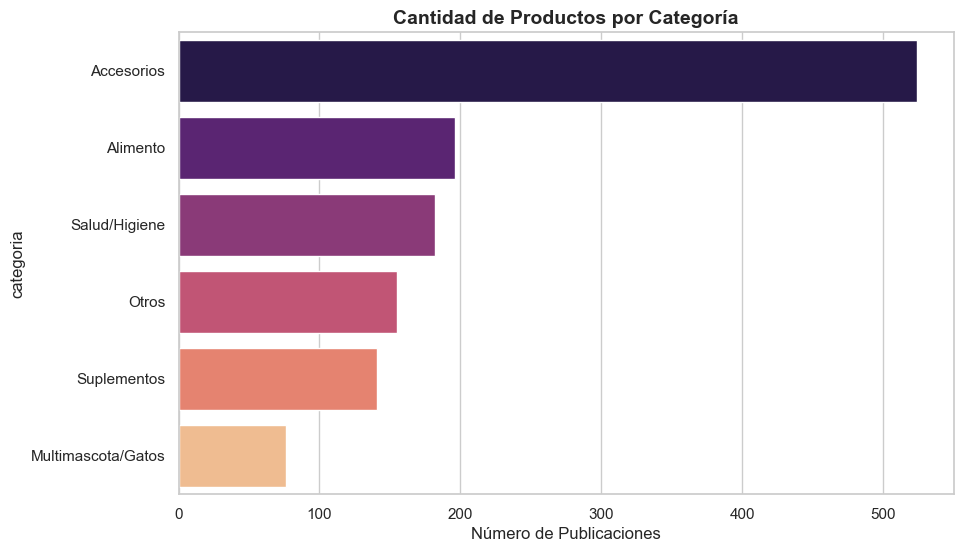

In [32]:
plt.figure()

conteo_cat = df['categoria'].value_counts()
sns.barplot(x=conteo_cat.values, y=conteo_cat.index, palette='magma')
plt.title('Cantidad de Productos por Categoría', fontsize=14, fontweight='bold')
plt.xlabel('Número de Publicaciones')
plt.show()

El análisis de la oferta revela que la categoría 'Accesorios' lidera en cantidad de publicaciones. Este fenómeno sugiere dos factores clave:

- Desde la Demanda: Existe un interés creciente por el bienestar integral de la mascota, donde el confort (camas, arneses) y la estética (ropa) cobran igual relevancia que la nutrición.

- Desde la Oferta: Es la categoría con mayor diversificación de producto, lo que permite una amplia gama de precios y estilos para captar a diferentes nichos de mercado, a diferencia del alimento que tiende a ser un 'commodity